## Table of Contents

- Introduction to k Nearest Neighbours Algorithm
- k Nearest Neighbours intuition
- How to decide the number of neighbours in kNN
- Eager learners vs lazy learners
- Import libraries
- Import dataset
- Exploratory data analysis
- Data visualization
- Declare feature vector and target variable
- Split data into separate training and test set
- Feature engineering
- Feature scaling
- Fit Neighbours classifier to the training set
- Predict the test-set results
- Check the accuracy score
- Rebuild kNN classification model using different values of k
- Confusion matrix
- Classification metrices
- ROC - AUC
- k-Fold Cross Validation
- Results and conclusion
- References

## Introduction to KNN algorithm

In machine learning, K Nearest Neighbors or KNN is the simplest of all machine learning algorithms. It is a non-parametric algorithm used for classification and Regression task. Non- parametric means there is no assumption required for data distribution. So, knn does not require any underlying assumption to be made. In both classification and regression tasks, the input consists of the k closest training examples in the feature space. The output depends upon whether kNN is used for regression or classification purposes. 

- In kNN classification, the output is a class membership. The given data point is classified based on the majority of type of its neighbors. The data point is assigned to the most frequent class among its k nearest neighbors. Usually k is a small positive integer. if k = 1, then the data point is simply assigned to the class if that single nearest neighbor.

- In knn regression, the output is simply some property value for the object. This value is the average of the values of k nearest neigbors.


KNN is a type of instance-based learning or lazy learning. Lazy learnig means it does not require any training data points for model generation. All training data will be used in the testing phase. This makes training faster and testing slower and costlier. So, the testing phase requires more time and memory resources.

In kNN, the neighbours are taken from a set of objects for which the class or the object property value is known. This can be thought of as the training set for the kNN algorithm, though no explicit training step is required. In both classification and regression kNN algorithm, we can assign weight to the contributions of the neighbours. So, nearest neighbours contribute more to the average than the more distant ones.

## K Nearest Neighbor Intuition

The KNN algorithm intuition is very simple to understand. It simply calculates the distance between a sample data point and all the other training data points. The distance can be Euclidean Distance or Manhattan Distance. Then, it selects the k nearest data points where k can be any interger. Finally, it assigns the sample data point to the class which the majority of the k data points belong.

Now, we will see kNN algorithm in action. Suppose,we have a dataset with two variables which are classifed as Red and Blue. In kNN algorithm, k is the number of nearest neighbors. Generally, k is an odd number because it helps to decide majority of the class. When k = , the algorithm is known as the nearest neighbor algorithm. Now, we want to classifiy a new data point X into Blue class or Red class. Suppose the value of k is 3. The kNN algorithm will start calculating the distance between X and all the other data points. It then finds the 3 nearest points with least distance to point X. 

In final step the kNN algorithm, we assign the new data point X to majority of the class of 3 data points.  If 2 of the 3 nearest points belong to the class Red while 1 belong to the class Blue, then we classify the new data point as Red.

## How to decide the number of neighbors in kNN

While building the kNN classifier model, one question that come to my mind is what should be the value of nearest neighbors (k) that yields highest accuracy. This is very important question because the classification accuracy depends upon the value of k.

The number of neighbors (k) in kNN is a parameter that we need to select at the time of model building. Selecting the optimal value of k in kNN is the most critical problem. A small value of k means that noise will have higfher influence on the result. So, the probabiltiy of over fitting is very high. A large value of k makes it computationally very expensive in terms of time to build a model. Also, a large value of k will have a smoother decision boundry which means a lower variace but higher bias.

The data scientists choose an odd value of k if the number of classes is even. We can apply the elbow method to select the value of k. To optimize the results, we can use Cross Validation technique. Using the cross-validation technique, we can test the kNN algorithm with different values of k. The model which gives good accuracy can be considered to be an optimal choice. It depends on individual cases and at times best process is to run through each possible value of k and test our result.

## Eager learners vs Lazy Learners
Eager learners mean when giving training data points, we will construct a generalized model before performing prediction on given new points to classify. We can think of such learners as being ready, active and eager to classify new data points.

Lazy learning means there is no need for learning or training of the model and all of the data points are used at the time of prediction. Lazy learners wait until the last minute before classifying any data point. They merely store the training dataset and waits until classification needs to perform. Lazy learners are also known as instance-based learners because lazy learners store the training points or instances, and all learning is based on instances.

Unlike eager learners, lazy learners do less work in the training phase and more work in the testing phase to make a classification.

In [1]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Import dataset
data = pd.read_csv(r"F:\Prashant Kaggle\KNN clasifier\breast-cancer-wisconsin.data.txt",header = None)
df = data.copy()
df


0   1   2   3   4   5   6   7   8   9   10
0    1000025   5   1   1   1   2   1   3   1   1   2
1    1002945   5   4   4   5   7  10   3   2   1   2
2    1015425   3   1   1   1   2   2   3   1   1   2
3    1016277   6   8   8   1   3   4   3   7   1   2
4    1017023   4   1   1   3   2   1   3   1   1   2
..       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
694   776715   3   1   1   1   3   2   1   1   1   2
695   841769   2   1   1   1   2   1   1   1   1   2
696   888820   5  10  10   3   7   3   8  10   2   4
697   897471   4   8   6   4   3   4  10   6   1   4
698   897471   4   8   8   5   4   5  10   4   1   4

[699 rows x 11 columns]

## Exploratory Data Analysis

In [3]:
df.shape

(699, 11)

## Rename Column Names


In [4]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df.columns = col_names

df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [5]:
## Drop Redundant Columns
df.drop("Id", axis = 1,inplace = True)

In [6]:
## View Summary of The Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


We can see that there are 9 numerical variables and 1 categorical variable in the dataset. I will check the frequency distribution of values in the variables to confirm the same.

## Frequency Distribution of Values in Variables


In [7]:
for var in df.columns:
    print(df[var].value_counts())

1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump_thickness, dtype: int64
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: Uniformity_Cell_Size, dtype: int64
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: Uniformity_Cell_Shape, dtype: int64
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: Marginal_Adhesion, dtype: int64
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: Single_Epithelial_Cell_Size, dtype: int64
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: Bland_Chromatin, dtype: int64
1     443
10     

In [8]:
# The distribution of values shows that data type of Bare_Nuclei is of type integer. But the summary of the dataframe shows that it is type object. So, I will explicitly convert its data type to integer.
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'],errors='coerce')

In [9]:
# check datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_Cell_Size         699 non-null    int64  
 2   Uniformity_Cell_Shape        699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei                  683 non-null    float64
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


- There are 10 numerical variables in the dataset.
- All of the variables are of discrete type.
- Out of all the 10 variables, the first 9 variables are feature variables and last variable Class is the target variable.

## Explore Missing Values


In [10]:
df.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

We can see that the Bare_Nuclei column contains missing values. We need to dig deeper to find the frequency distribution of values of Bare_Nuclei.

In [11]:
## Check Frequency Distribution of a Column containing missing values
df['Bare_Nuclei'].value_counts()

1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: Bare_Nuclei, dtype: int64

In [12]:
# Check unqiue values in "Bare_Nuclei"
df['Bare_Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

We can see that there are 16 missing values in a column "Bare_Nuclei". I will impute missing values after dividing the dataset into train and test sets.

In [13]:
## Check Frequecy Of Distribution of Values in "Class" variable
(df['Class'].value_counts()/df['Class'].shape[0] )*100

2    65.522175
4    34.477825
Name: Class, dtype: float64

We can see that the Class variable contains 2 class labels - 2 and 4. 2 stands for benign and 4 stands for malignant cancer.

In [14]:
## Outliers in Numerical Variable
print(round(df.describe(),2))

       Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
count           699.00                699.00                 699.00   
mean              4.42                  3.13                   3.21   
std               2.82                  3.05                   2.97   
min               1.00                  1.00                   1.00   
25%               2.00                  1.00                   1.00   
50%               4.00                  1.00                   1.00   
75%               6.00                  5.00                   5.00   
max              10.00                 10.00                  10.00   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
count             699.00                       699.00       683.00   
mean                2.81                         3.22         3.54   
std                 2.86                         2.21         3.64   
min                 1.00                         1.00         1.00   
25%       

KNN algorithm is robust to outliers.

## Data Visualization
Now, we have a basic understanding of our data. I will supplement it with some data visualization to get better understanding of our data.

### Univariate Plots

### Check the distribution variable
Now, I will plot the histograms to check variable distributions to find out if they are normal or skewed.

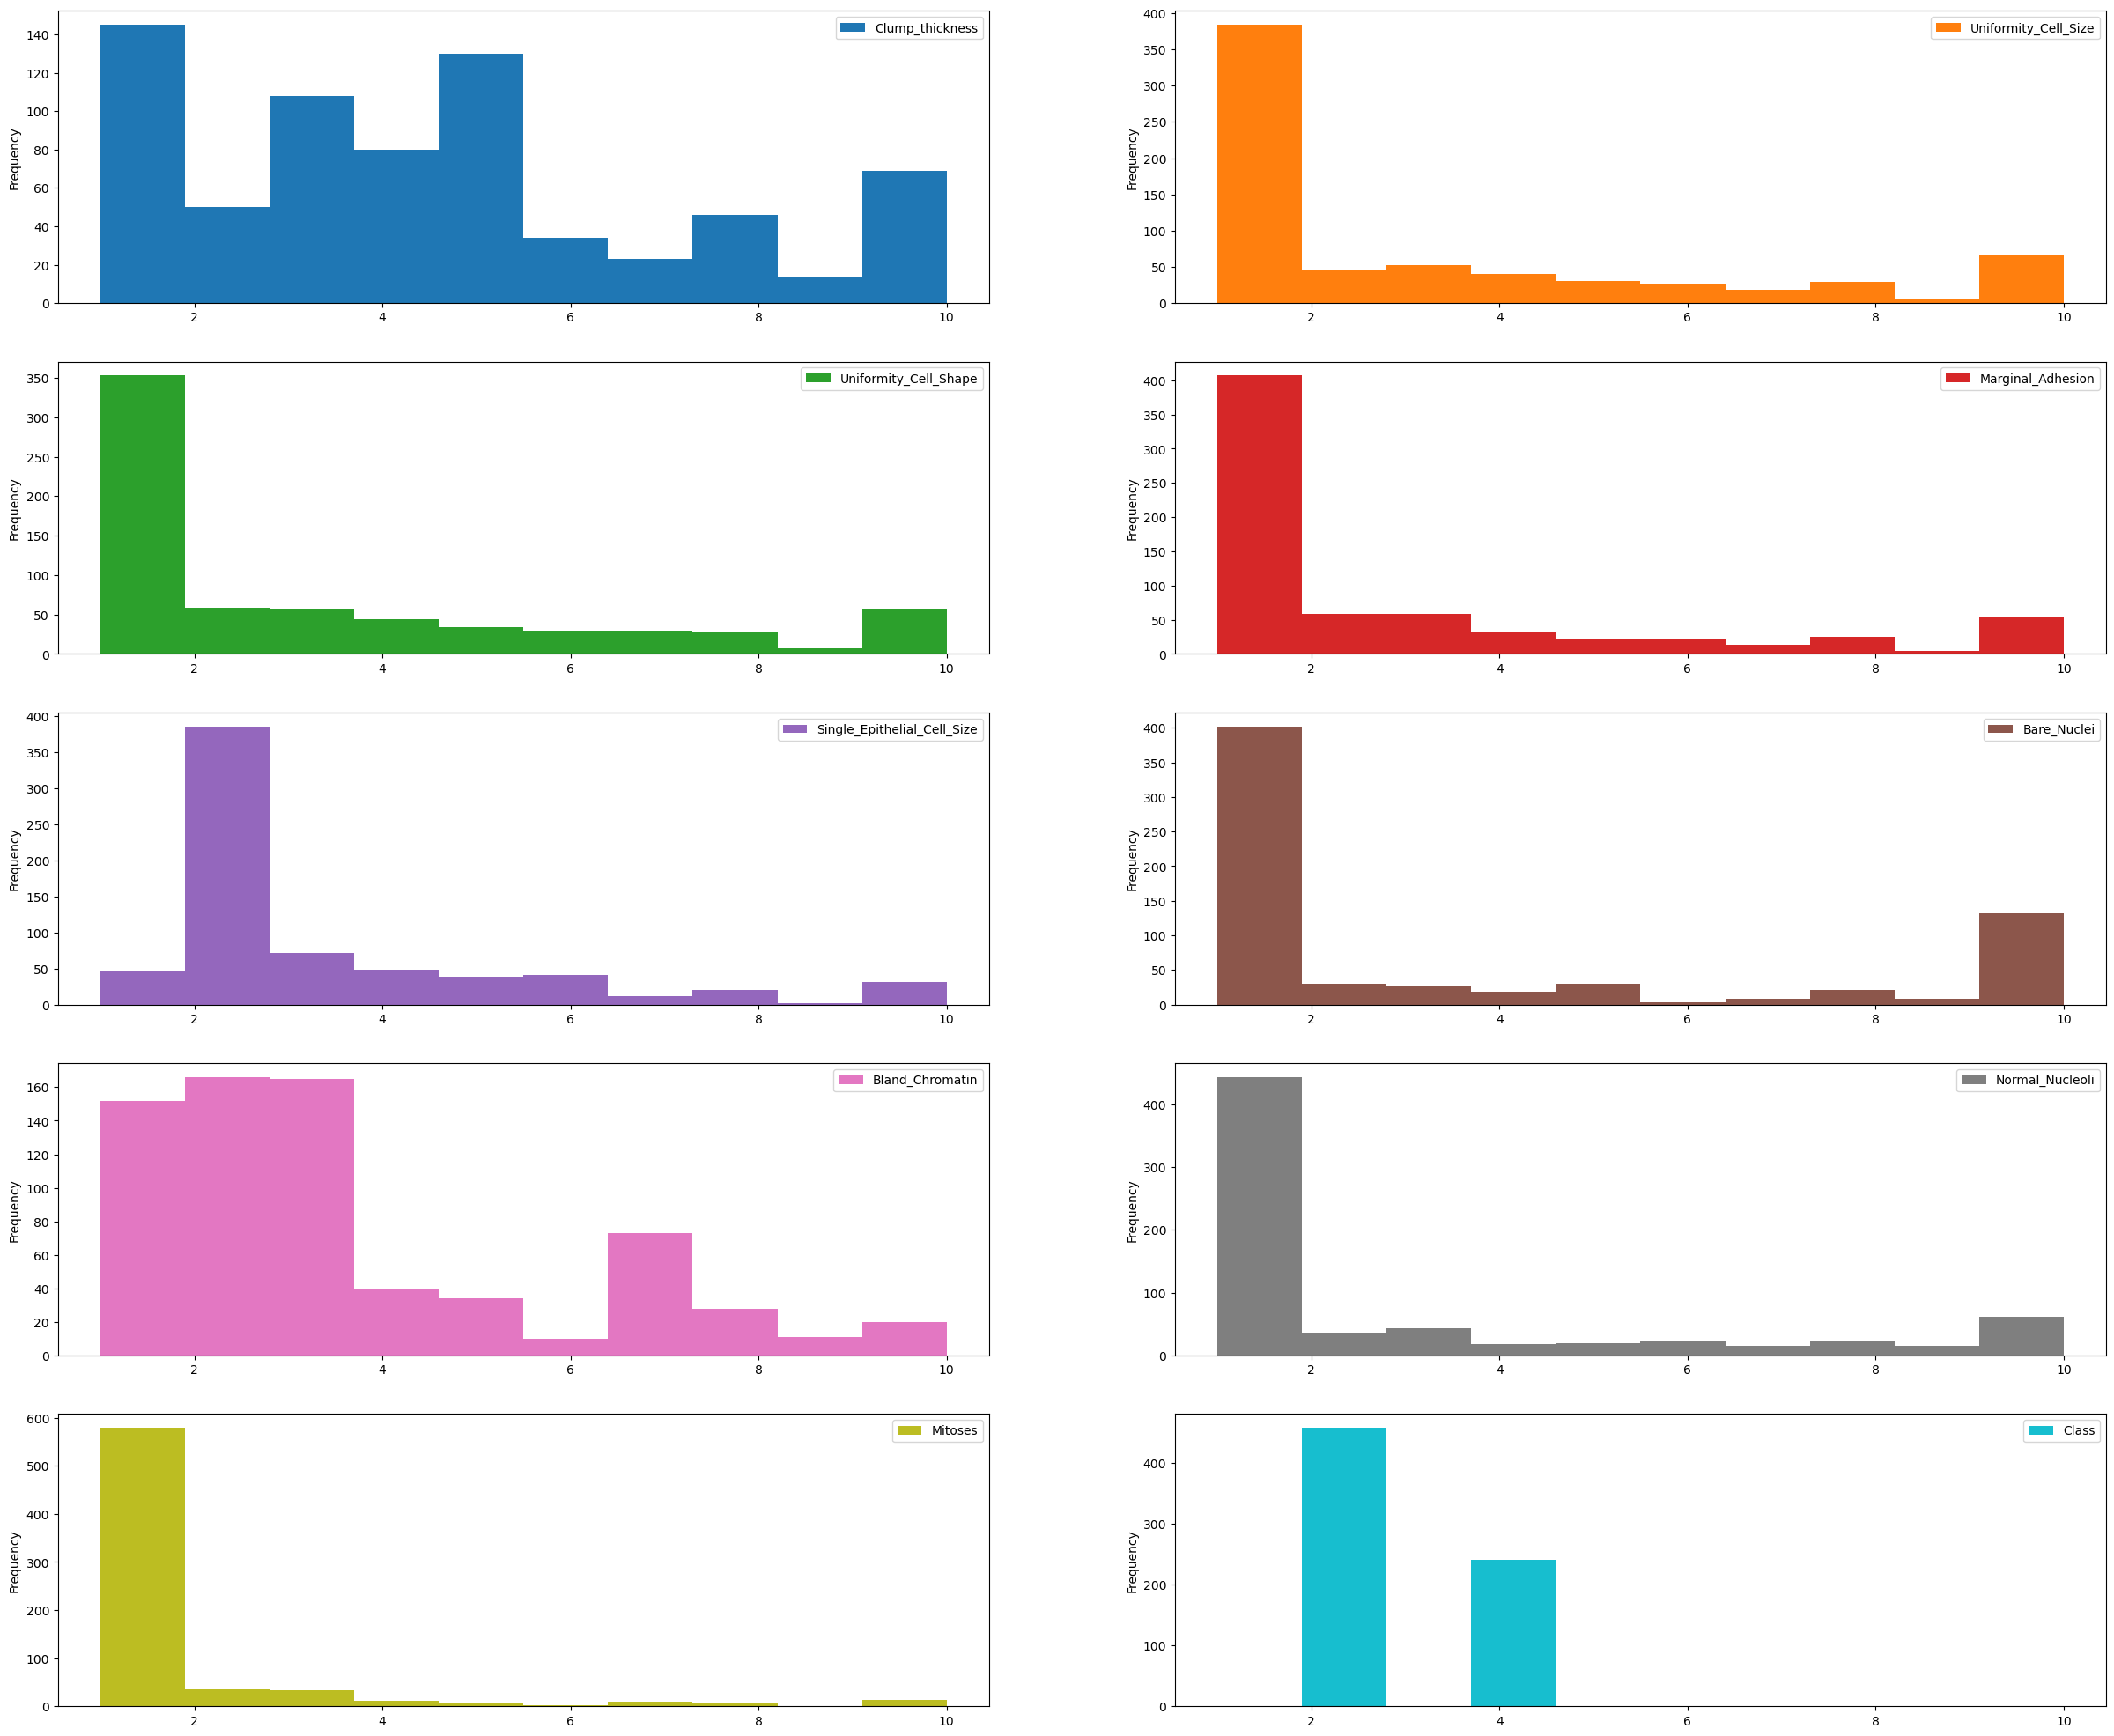

In [15]:
## Plot Histograms Of the Varibales

plt.rcParams['figure.figsize'] =(30,25)

df.plot(kind= 'hist', bins = 10, subplots = True, layout = (5,2),sharex = False, sharey = False)

plt.show()

We can see that all the variables in the dataset are postively skewed.

## Multivariate Plots

## Estimating Correlation Coefficients
Our dataset is very small. So, we can compute the standard correlation coefficient (also called Pearson's r) between every pair of attributes. We can compute it using the df.corr() method as follows:-

In [16]:
correlation = df.corr()

Our target variable is Class. So, we should check how attribute correlates with the Class variable. We can do it as follows:-

In [17]:
correlation['Class'].sort_values(ascending= False)

Class                          1.000000
Bare_Nuclei                    0.822696
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

- The correlation coefficient ranges from -1 to 1.
- When it close to +1, that signifies that there is a strong positive correlation. So, we can see that there is a strong positive correlation between class and Bare_Nuclei, Class and Uniformity_Cell_Shape, Class and Uniformity_Cell_Size.
- When it is clsoe to -1, it means that there is a strong negative correlation. When it is close to 0, it means that there is no correlation.

- We can see that all the variables are positively correlated with Class variable. Some variables are strongly positive correlated while some variables are negatively correlated.

Discover patterns and relationships
An important step in EDA is to discover patterns and relationships between variables in the dataset. I will use the seaborn heatmap to explore the patterns and relationships in the dataset.

### Correlation Heat Map


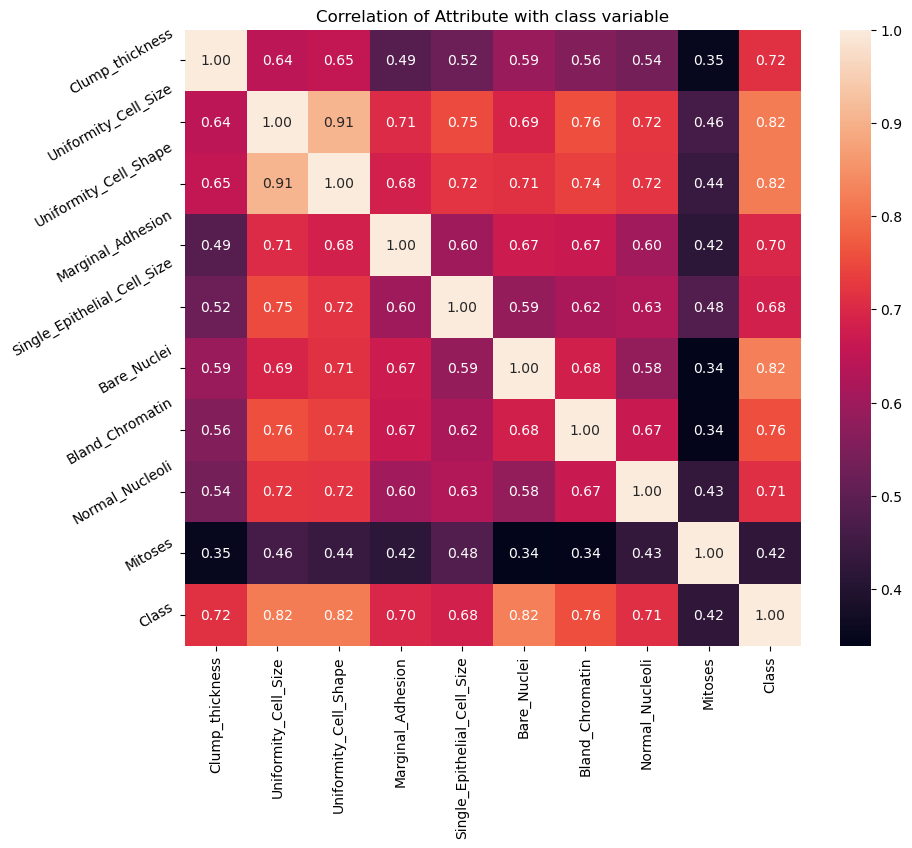

In [18]:
plt.figure(figsize = (10,8))
plt.title("Correlation of Attribute with class variable")
a = sns.heatmap(correlation, square = True, annot=True, fmt = '.2f', linecolor='white'  )
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

### Interpretation
From the above correlation heat map, we can conclude that :-

1.Class is highly positive correlated with Uniformity_Cell_Size, Uniformity_Cell_Shape and Bare_Nuclei. (correlation coefficient = 0.82).

2.Class is positively correlated with Clump_thickness(correlation coefficient=0.72), Marginal_Adhesion(correlation coefficient=0.70), Single_Epithelial_Cell_Size)(correlation coefficient = 0.68) and Normal_Nucleoli(correlation coefficient=0.71).

3.Class is weekly positive correlated with Mitoses(correlation coefficient=0.42).

4.The Mitoses variable is weekly positive correlated with all the other variables(correlation coefficient < 0.50).

### Declare feature vector and target vector


In [19]:
X = df.drop(['Class'],axis = 1)
y = df['Class']

### Split The Dataset Into Train and Test Sets

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train , y_test = train_test_split(X,y, random_state = 0, test_size = 0.2)

In [21]:
# Check the shape of X_train and X_test
X_train.shape, X_test.shape

((559, 9), (140, 9))

## Feature Engineering
Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

In [22]:
# Check the datatypes in X_train
X_train.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
dtype: object

In [23]:
## Engineering missing values in variales
## Check missing values in X_train
X_train.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    13
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
dtype: int64

In [24]:
## Check missing values in X_test
X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    3
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [25]:
## Print percentage ofmissing values in numerical variables in trian set
X_train.isnull().mean()*100

Clump_thickness                0.000000
Uniformity_Cell_Size           0.000000
Uniformity_Cell_Shape          0.000000
Marginal_Adhesion              0.000000
Single_Epithelial_Cell_Size    0.000000
Bare_Nuclei                    2.325581
Bland_Chromatin                0.000000
Normal_Nucleoli                0.000000
Mitoses                        0.000000
dtype: float64

 assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.

I will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid overfitting.

In [26]:
## Missing values imputaion in X_train and X_test
for df1 in [X_train,X_test]:
    for col in X_train.columns:
        col_median = X_train[col].median()
        df1[col].fillna(col_median, inplace = True)

We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling. I will do it as follows.m

In [27]:
## Feature Sclaing
cols = X_train.columns

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train,columns= cols)
X_test = pd.DataFrame(X_test, columns= cols)


## Fit K Neighbours Classifier to the training set

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)


KNeighborsClassifier()

## Predict test results


In [30]:
y_pred = knn.predict(X_test)
y_pred

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2], dtype=int64)

## Predict_Proba method
predict_proba method gives the probabilities for the target variables(2 and 4) in this case,in array form.

2 is for probability of benign cancer and 4 is for probability of malignant cancer.

In [31]:
## Prob of getting output as 2 - benign cancer
knn.predict_proba(X_test)[:, 0]

# probability of getting output as 4 - malignant cancer

knn.predict_proba(X_test)[:,1]

array([0. , 0. , 0.8, 0. , 1. , 0. , 0.8, 0. , 1. , 0.6, 0. , 0. , 1. ,
       0.8, 1. , 0. , 0. , 1. , 1. , 0. , 0.8, 1. , 0. , 0. , 0. , 1. ,
       0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 1. , 0. ,
       0. , 0. , 0. , 0. , 0. , 1. , 1. , 0. , 1. , 0. , 1. , 1. , 0. ,
       0. , 1. , 0. , 0. , 0. , 0. , 0.2, 0. , 1. , 0. , 0. , 1. , 1. ,
       0.8, 1. , 0. , 0. , 0.8, 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. ,
       1. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 1. , 0. , 1. , 1. , 0. ,
       0. , 0.4, 1. , 0. , 0. , 0. , 1. , 0. , 1. , 1. , 0. , 0. , 0. ,
       0.8, 0. , 0. , 0. , 0. , 0. , 0.8, 0.8, 1. , 0. , 0. , 0. , 0. ,
       0. , 1. , 1. , 1. , 0.8, 0. , 1. , 0. , 0. , 0.6, 0.6, 1. , 1. ,
       1. , 0. , 0. , 0.8, 1. , 0. , 0. , 1. , 0. , 0. ])

In [32]:
# Check accuracy score
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9714


Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

In [33]:
y_pred_train = knn.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9696


In [34]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9696
Test set score: 0.9714


The training-set accuracy score is 0.9821 while the test-set accuracy to be 0.9714. These two values are quite comparable. So, there is no question of overfitting.

## Compare model accuracy with null accuracy
So, the model accuracy is 0.9714. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [35]:
## Check the null accuraacy
null_accuracy = 85/(85+55)

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6071


We can see that our model accuracy score is 0.9714 but null accuracy score is 0.6071. So, we can conclude that our K Nearest Neighbors model is doing a very good job in predicting the class labels.

## Rebuild kNN Classification model using different values of k 
I have build the kNN classification model using k=3. Now, I will increase the value of k and see its effect on accuracy.

In [36]:
## Rebuild knn classificqation model using k = 5

knn_5 = KNeighborsClassifier(n_neighbors=5)


# fit the model to the training set
knn_5.fit(X_train, y_train)


# predict on the test-set
y_pred_5 = knn_5.predict(X_test)


print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=5 : 0.9714


## Rebuild knn Classification model using 6

In [37]:
# instantiate the model with k=6
knn_6 = KNeighborsClassifier(n_neighbors=6)


# fit the model to the training set
knn_6.fit(X_train, y_train)


# predict on the test-set
y_pred_6 = knn_6.predict(X_test)


print('Model accuracy score with k=6 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_6)))

Model accuracy score with k=6 : 0.9786


## Confusion Matrix


In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix\n",cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix
 [[82  3]
 [ 1 54]]

True Positives(TP) =  82

True Negatives(TN) =  54

False Positives(FP) =  3

False Negatives(FN) =  1


The confusion matrix shows 83 + 53 = 136 correct predictions and 2 + 2 = 4 incorrect predictions.

In this case, we have

- True Positives (Actual Positive:1 and Predict Positive:1) - 83
- True Negatives (Actual Negative:0 and Predict Negative:0) - 53
- False Positives (Actual Negative:0 but Predict Positive:1) - 2 (Type I error)
- False Negatives (Actual Positive:1 but Predict Negative:0) - 2 (Type II error)

In [39]:
# instantiate the model with k=7
knn_7 = KNeighborsClassifier(n_neighbors=7)


# fit the model to the training set
knn_7.fit(X_train, y_train)


# predict on the test-set
y_pred_7 = knn_7.predict(X_test)


print('Model accuracy score with k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

# Print the Confusion Matrix with k =7 and slice it into four pieces

cm_7 = confusion_matrix(y_test, y_pred_7)

print('Confusion matrix\n\n', cm_7)

print('\nTrue Positives(TP) = ', cm_7[0,0])

print('\nTrue Negatives(TN) = ', cm_7[1,1])

print('\nFalse Positives(FP) = ', cm_7[0,1])

print('\nFalse Negatives(FN) = ', cm_7[1,0])

Model accuracy score with k=7 : 0.9786
Confusion matrix

 [[83  2]
 [ 1 54]]

True Positives(TP) =  83

True Negatives(TN) =  54

False Positives(FP) =  2

False Negatives(FN) =  1


<Axes: >

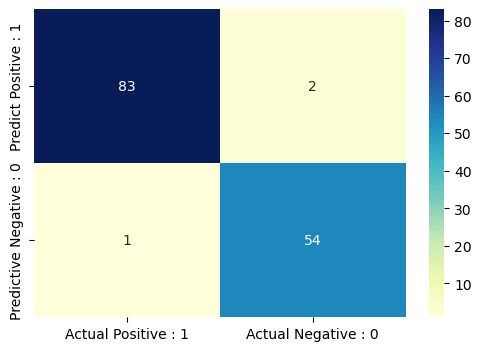

In [40]:
## Visulaize the confusion matrix with seaborn heatmap

plt.figure(figsize= (6,4))

cm_matrix = pd.DataFrame(data = cm_7, columns = ['Actual Positive : 1', 'Actual Negative : 0'],
                        index = ['Predict Positive : 1', 'Predictive Negative : 0'])

sns.heatmap(cm_matrix, annot =True, fmt = 'd', cmap= 'YlGnBu')


## Classification Report

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_7))


              precision    recall  f1-score   support

           2       0.99      0.98      0.98        85
           4       0.96      0.98      0.97        55

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



## f1-score
f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

## Support
Support is the actual number of occurrences of the class in our dataset.

## Adjusting the threshold level

In [46]:
y_pred_prob = knn.predict_proba(X_test)[0:10]
y_pred_prob

array([[1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0. , 1. ],
       [0.4, 0.6]])

In each row, the numbers sum to 1.
There are 2 columns which correspond to 2 classes - 2 and 4.
- Class 2 - predicted probability that there is benign cancer.    

- Class 4 - predicted probability that there is malignant cancer.


Importance of predicted probabilities

We can rank the observations by probability of benign or malignant cancer.
predict_proba process

Predicts the probabilities

Choose the class with the highest probability

Classification threshold level

There is a classification threshold level of 0.5.

Class 4 - probability of malignant cancer is predicted if probability > 0.5.

Class 2 - probability of benign cancer is predicted if probability < 0.5.

In [47]:
#store the probabilities in the dataframe
y_pred_prob_df =pd.DataFrame(y_pred_prob, columns =['Prob of - benign cancer(2)', 'Prob of - malignant cancer(4)'])
y_pred_prob_df

Prob of - benign cancer(2)  Prob of - malignant cancer(4)
0                         1.0                            0.0
1                         1.0                            0.0
2                         0.2                            0.8
3                         1.0                            0.0
4                         0.0                            1.0
5                         1.0                            0.0
6                         0.2                            0.8
7                         1.0                            0.0
8                         0.0                            1.0
9                         0.4                            0.6

In [48]:
# Print first 10 probabilitis of class -4 (Prob of malignant cancer)
y_pred_1 = knn.predict_proba(X_test)[:, 1]


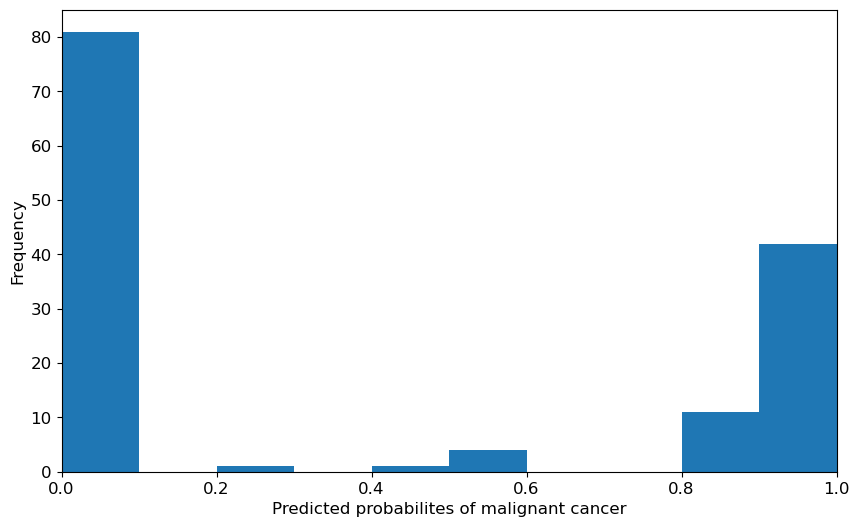

In [50]:
# plot the histogram of predicted probabilities

# adjust the figuresize
plt.figure(figsize= (10,6))

# adjust the font size
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(y_pred_1, bins= 10)

#Set the x lim
plt.xlim(0,1)

#Set the title
plt.xlabel("Predicted probabilites of malignant cancer")
plt.ylabel("Frequency")

plt.show()

## Observations
- We can see that the above histogram is positively skewed.
- The first column tell us that there are approximately 80 observations with 0 probability of malignant cancer.
- There are few observations with probability > 0.5.
- So, these few observations predict that there will be malignant cancer.
## Comments
- In binary problems, the threshold of 0.5 is used by default to convert predicted probabilities into class predictions.
- Threshold can be adjusted to increase sensitivity or specificity.
- Sensitivity and specificity have an inverse relationship. Increasing one would always decrease the other and vice versa.
- Adjusting the threshold level should be one of the last step you do in the model-building process.

# ROC-AUC

## ROC- Curve
ROC Curve
Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

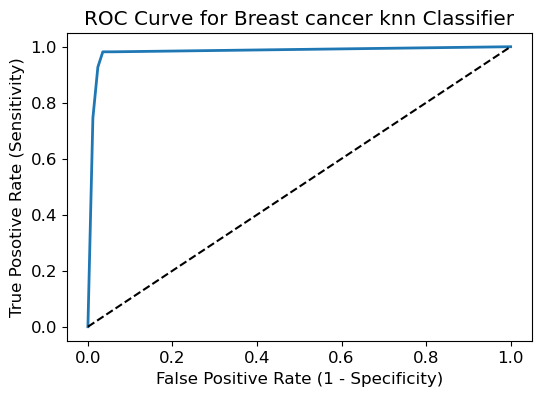

In [54]:
## Plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,y_pred_1, pos_label= 4)

plt.figure(figsize = (6,4))

plt.plot(fpr, tpr, linewidth = 2)

plt.plot([0,1], [0,1],'k--')

plt.title("ROC Curve for Breast cancer knn Classifier")

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Posotive Rate (Sensitivity)')

plt.show()

ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context

## ROC AUC
ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

In [56]:
## compute ROC-AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_1)

print(ROC_AUC)

0.9811764705882353


ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it is benign or malignant cancer.

In [59]:
# Calculate cross - validated roc_auc
from sklearn.model_selection import cross_val_score

cross_val_roc_auc = cross_val_score(knn_7,X_train, y_train, cv = 5, scoring='roc_auc' ).mean()

print('Cross validated ROC AUC : {:.4f}'.format(cross_val_roc_auc))

Cross validated ROC AUC : 0.9910


## Interpretation
Our Cross Validated ROC AUC is very close to 1. So, we can conclude that, the KNN classifier is indeed a very good model.

# k-fold cross vaidation

In this section, I will apply k-fold Cross Validation technique to improve the model performance. Cross-validation is a statistical method of evaluating generalization performance It is more stable and thorough than using a train-test split to evaluate model performance.

In [62]:
# Applying 10 fold cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn_7,X_train, y_train, cv = 10, scoring= 'accuracy')
print(scores)

print(f"\navg cross val accuracy: {scores.mean()}")

[0.875      0.96428571 0.94642857 0.98214286 0.96428571 0.96428571
 0.98214286 0.98214286 1.         0.98181818]

avg cross val accuracy: 0.9642532467532468


## Interpretation

Using the cross_val_score we can expect the model to be around 96.45% accuracte on an average.

If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively high variance in the accuracy between folds, ranging from 100% accuracy to 87.72% accuracy. So, we can conclude that the model is very dependent on the particular folds used for training, but it also be the consequence of the small size of the dataset.

We can see that 10-fold cross-validation accuracy does not result in performance improvement for this model.

## Results and Conclusion 

In this project, I build a kNN classifier model to classify the patients suffering from breast cancer. The model yields very good performance as indicated by the model accuracy which was found to be 0.9786 with k=7.

With k=3, the training-set accuracy score is 0.9821 while the test-set accuracy to be 0.9714. These two values are quite comparable. So, there is no question of overfitting.

I have compared the model accuracy score which is 0.9714 with null accuracy score which is 0.6071. So, we can conclude that our K Nearest Neighbors model is doing a very good job in predicting the class labels.

Our original model accuracy score with k=3 is 0.9714. Now, we can see that we get same accuracy score of 0.9714 with k=5. But, if we increase the value of k further, this would result in enhanced accuracy. With k=6,7,8 we get accuracy score of 0.9786. So, it results in performance improvement. If we increase k to 9, then accuracy decreases again to 0.9714. So, we can conclude that our optimal value of k is 7.

kNN Classification model with k=7 shows more accurate predictions and less number of errors than k=3 model. Hence, we got performance improvement with k=7.

ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it is benign or malignant cancer.

Using the mean cross-validation, we can conclude that we expect the model to be around 96.46 % accurate on average.

If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively high variance in the accuracy between folds, ranging from 100% accuracy to 87.72% accuracy. So, we can conclude that the model is very dependent on the particular folds used for training, but it also be the consequence of the small size of the dataset.